# Actividad :  Resolución de problema mediante búsqueda heurística

## Enunciado de la actividad

En esta actividad has de utilizar la estrategia de búsqueda heurística A* con el fin de generar un plan que permita al robot de Amazon mover el inventario de un estado inicial a un estado objetivo. 

### Estado inicial

El estado inicial del problema lo vamos a representar en una mátriz 4x4 de carácteres de la siguiente manera:

![texto alternativo](https://drive.google.com/uc?export=view&id=1Mzml6909YsiwqCB77-xeLYRoVt93uLKg)		

Donde, 

*   R: representa el robot. Inicialmente está ubicado en la posición [2,2]
*   \#: representa una pared. 
*   M1, M2, e M3: representan los tres inventarios que el robot debe mover. Y se encuentran ubicadas en las posiciones [0,0], [2,0] y [0,3] respectivamente.


### Estado Objetivo 

El robot debe mover los 3 inventarios, M1, M2 y M3, a la siguientes posiciones:


![texto alternativo](https://drive.google.com/uc?export=view&id=1rhaD4HXNAHjp9v2algygF38-OVNePBSe)

## Solución propuesta

Antes de empezar a programar el algoritmo A$^{*}$ debemos definir la estrucura de dato con la que trabajaremos. Dicha estructura debe contener la información adecuada para identificar a cada uno de los posibles 'nodos' por los que podrá moverse el robot.

Para ello, hemos definido la siguiente clase en Python, que contiene los siguientes datos:
<ul>
    <li>valor: propiedad de tipo string que identificará qué tipo de nodo es ('#' será pared, 'M*' inventario, 'R' robot, o '' nodo vacío)
    <li>posicion:La posicion del nodo dentro del conjunto (2 dimensiones)
    <li>padre: Nodo padre al que pertenece este nodo. En un principio será nulo porque no lo sabemos, pero el algoritmo A$^{*}$ será el encargado de ir dando valor a esta propiedad.
    <li>G: valor de g(n) que utilizará el algoritmo
    <li>H valor de h(n) que utilizará el algoritmo
</ul>

In [1]:
class Node:
    """
    La clase Node contiene la estructura y los parámetros necesarios en cada nodo
    para que el algoritmo A* sea capaz de calcular la ruta adecuada
    :param valor: valor o nombre del nodo (R-Robot, #-Pared, M1-Inventario1...)
    :param posicion: posición bidimensional del nodo en la matriz
    :param padre: Valor del nodo padre, por defecto nulo
    :param H: valor de h(n) calculado para ese nodo durante la ejecución del algoritmo, por defecto 0
    :param G: valor de g(n) calculado para ese nodo durante la ejecución del algoritmo, por defecto 0
    """
    def __init__(self, valor, posicion):
        self.valor = valor
        self.posicion = posicion
        self.padre = None
        self.H = 0
        self.G = 0

La siguiente función sirve para calcular la distancia de Manhattan entre dos puntos dados (nodos)

In [2]:
def manhattan_distance(origen, destino):
    """
    Esta funcion calcula la distancia de manhattan entre dos vectores
    :param origen:  vector uno
    :param destino: vector dos
    :return: la distancia Manhattan entre dos vectores
    """
    return abs(origen[0] - destino[0]) + abs(origen[1] - destino[1])

A continuación, se definen las tres funciones core del algoritmo, ya que son las que se encargan de resolver el problema para que el robot actúe como se pide en el enunciado:

<ul>
    <li><b>a_star</b>: Esta función es la implementación del algoritmo A$^{*}$. Le pasamos el nodo inicio, el nodo destino, y el conjunto de nodos totales. Con esta información, calculará y devolverá la ruta más adecuada (si la encuentra). En caso de que no encuentre ninguna ruta, lanza una excepción para evitar que entre en un bucle infinito.
    <li><b>get_vecinos</b>: Esta función es utilizada por el algoritmo A$^{*}$ en cada una de las iteraciones que realiza. Sirve para calcular los vecinos posibles de cada nodo y planificar el siguiente movimiento del robot. Además, tiene en cuenta que hay ciertos nodos que no pueden ser atravesados, por ejemplo las paredes y/o los inventarios.
    <li><b>actualiza_tabla</b>: Una vez se ha encontrado una ruta entre dos puntos, simulamos el movimiento del robot, de modo que la posición de partida del robot para el siguiente movimiento sea la posición final del movimiento anterior. Además, simula también el movimiento de los inventarios
</ul>

In [3]:
def a_star(inicio, destino, tabla):
    """
    Implementación del algoritmo A*
    :param inicio: nodo de partida para la búsqueda
    :param destino: nodo de destino al que queremos llegar
    :param tabla: matriz con la información de todos los nodos
    :return: Devuelve la ruta encontrada desde el inicio hasta el destino en base a la f(n) = g(n) + h(n) óptima
    """
    # Definimos los sets donde iremos guardando elementos de la busqueda
    cola_abierta = set()
    cola_cerrada = set()
    # Posicion actual sera la inicial
    actual = inicio
    cola_abierta.add(actual)
 
    while cola_abierta:
        # Teniendo en cuenta que f(n) = g(n) + h(n), buscamos el nodo con menor f(n)
        actual = min(cola_abierta, key=lambda nodo:nodo.G + nodo.H)
        
        # Si ya hemos llegado al nodo destino, devolvemos la ruta
        if actual == destino:
            ruta = []
            while actual.padre:
                ruta.append(actual)
                actual = actual.padre
            ruta.append(actual)
            return ruta[::-1]
        
        # Si no, eliminamos el nodo de la cola abierta
        cola_abierta.remove(actual)
        
        # Y lo introducimos en la cola cerrada (visitado)
        cola_cerrada.add(actual)
        
        # Iteramos sobre los vecinos posibles del nodo actual y evaluamos
        for nodo in get_vecinos(actual, tabla, destino.valor):

            # Si ya lo hemos visitado, continuamos
            if nodo in cola_cerrada:
                continue
            
            # Si está en la cola abierta, evaluamos
            if nodo in cola_abierta:
                # Comprobamos si obtenemos un mejor valor de g(n)
                # usamos 1 porque el coste que se indica en el enunciado
                nuevo_g = actual.G + 1
                # si se cumple la condición, actualizamos el nodo padre
                if nodo.G > nuevo_g:
                    nodo.G = nuevo_g
                    nodo.padre = actual
            else:
                # Si no está en la cola abierta, calculamos G y H para el nodo
                # usamos 1 porque el coste que se indica en el enunciado
                nodo.G = actual.G + 1
                nodo.H = manhattan_distance(nodo.posicion, destino.posicion)
                # Ahora el odo padre será el actual
                nodo.padre = actual
                # Lo añadimos a la cola abierta
                cola_abierta.add(nodo)
                
    raise Exception('No se ha podido encontrar ninguna ruta')
                

def get_vecinos(nodo, tabla, destino):
    """
    Esta función sirve para calcular los posibles movimientos desde el nodo actual (vecinos). Para ello tiene en cuenta
    los nodos que han sido configurados como 'pared', y aquellos que se salen de las dimensiones del tablero
    :param nodo: nodo actual desde el que queremos calcular los vecinos
    :param tabla: tablero con toda la información de los nodos
    :param destino: nodo de destino al que debe dirigirse el robot
    """
    x,y = nodo.posicion
    vecinos = []
    
    # Estas son las posiciones prohibidas pro defecto
    posiciones_prohibidas = ['#', 'M1', 'M2', 'M3']
    
    # En caso de que el destino sea un inventario,  eliminamos ese valor 
    # de las posiciones prohibidas para que el robot pueda llegar a esa posición
    if destino in posiciones_prohibidas:
        posiciones_prohibidas.remove(destino)
        
    # cada nodo puede tener hasta 4 vecinos (excluyendo paredes e inventarios)
    if y+1 < len(tabla):
        if tabla[x][y+1] != None and tabla[x][y+1].valor not in posiciones_prohibidas: vecinos.append(tabla[x][y+1])
    if x+1 < len(tabla):
        if tabla[x+1][y] != None and tabla[x+1][y].valor not in posiciones_prohibidas: vecinos.append(tabla[x+1][y])
    if x-1 >= 0:
        if tabla[x-1][y] != None and tabla[x-1][y].valor not in posiciones_prohibidas: vecinos.append(tabla[x-1][y])
    if y-1 >= 0:
        if tabla[x][y-1] != None and tabla[x][y-1].valor not in posiciones_prohibidas: vecinos.append(tabla[x][y-1])
    return vecinos
            
def actualiza_tabla(tabla, movimientos):
    """
    Esta función sirve para actualizar el estado de los nodos en el tablero después de cada ejecución del algoritmo
    :param tabla: tablero con el estado inicial de los nodos
    :param movimientos: movimientos ejecutados por el algoritmo que deben ser actualizados en el tablero
    :return: el tablero actualizado
    """
    x_origen, y_origen = movimientos[0].posicion
    x_destino, y_destino = movimientos[-1:][0].posicion
    
    valor_origen = movimientos[0].valor
    valor_destino = movimientos[-1:][0].valor
    
    if valor_origen == 'R':
        tabla[x_origen][y_origen].valor = ''
    
    if tabla[x_destino][y_destino].valor == '':
        tabla[x_destino][y_destino].valor = valor_origen  
        tabla[x_origen][y_origen].valor = ''
    elif valor_origen != 'R' and valor_destino not in ['#', 'M1', 'M2', 'M3']:
        tabla[x_destino][y_destino].valor = valor_origen
        
    # Reseteamos valores para el cálculo de nuevas búsquedas
    for i in range(len(tabla)):
        for j in range(len(tabla[i])):
            tabla[i][j].padre = None
            tabla[i][j].H = 0
            tabla[i][j].G = 0        

Las siguientes funciones son auxiliares y nos sirven para mostrar por pantalla el funcionamiento del algoritmo y los pasos que va realizando antes los movimientos que le indicamos.

<ul>
    <li><b>imprime_tabla: </b>Muestra en pantalla el tablero según el estado en el que se encuentra. Además, tienen en cuenta la ruta realizada, la cual pinta de color azul clarito para indicar los nodos por los que ha pasado el robot. Finalmente, pinta en color oscuro el nodo en el que se encuentra el robot.
    <li><b>prettify_ruta: </b>Simplemente recibe la ruta obtenida por el algoritmo A$^{*}$ y crea una cadena de texto donde se guardan de forma más legible las coordenadas de los nodos que ha visitado el robot. Servirá para poder imprimirla por pantalla.
</ul>

In [4]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.ticker as ticker

def imprime_tabla(tabla, nodos_visitados):
    """
    Esta función sirve para imprimir por pantalla el estado actual de la tabla
    Además, pinta en color azul la celda en la que se encuentra el Robot en cada instante
    :param tabla: el conjunto de todos los nodos del tablero con sus estados correspondientes
    :param nodos_visitados: la lista de nodos visitados en la ruta realizada, que será remarcada de color azul
    """
    data = []

    for i in range(len(tabla)):
        lista_fila = []
        for j in range(len(tabla[i])):
            lista_fila.append(str(tabla[i][j].valor))
        data.append(lista_fila)
        
    # hacemos uso de la librería matplotlib para mostrar la tabla por pantalla
    pl.figure()
    tb = pl.table(cellText=data, loc=(0,0), cellLoc='center')
       
    # este bucle sirve para pintar de color azul la ruta de color azul claro
    for nodo in nodos_visitados:
        tb[nodo.posicion].set_facecolor('#cce9ff')  
    # después pintamos la posición final (robot) de un color azul más oscuro
    tb[nodos_visitados[-1:][0].posicion].set_facecolor('#56b5fd')

    for cell in tb.get_children(): 
        cell.set_fontsize(14)
        cell.set_height(1/len(tabla[0]))
        cell.set_width(1/len(tabla))

    ax = pl.gca()
    ax.set_xticks([])
    ax.set_yticks([])

    # nostramos el valor de cada celda de forma centrada
    ax.xaxis.tick_top()
    ax.xaxis.set_minor_locator(ticker.FixedLocator([0.127,0.37,0.625,0.867]))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['0','1','2','3']))
    ax.yaxis.set_minor_locator(ticker.FixedLocator([0.127,0.37,0.625,0.867]))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['3','2','1','0']))
    
def prettify_ruta(ruta):
    """
    Esta función sirve para hacer más legibles los nodos indicados en la ruta para poder llevar el 'tracking' del robot
    :param ruta: lista con cada uno de los nodos visitados por el robot. Esta lista es directamente 
    el valor que devuelve el algoritmo A*
    :return cadena de texto con los nodos visitados en formato (x1,y1) --> (x2, y2) ...
    """
    ruta_str = ''
    if not ruta:
        raise Exception('La ruta debe ser especificada')
    else:
        # iteramos sobre las posiciones de los nodos y creamos cadena de texto
        for nodo in ruta:
            x, y = nodo.posicion
            if ruta_str:
                ruta_str += '-->'
            ruta_str += '(' + str(x) + ',' + str(y) + ')'
    return ruta_str

Ahora ya tenemos todo listo para solventar el problema. El siguiente paso es transformar la información del tablero original en algo que podamos pasarle al algoritmo y que pueda entender. 

Para ello hacemos uso de la estructura de datos definida al principio, de modo que crearemos un array bidimensional de nodos con la información que se nos da.

Posteriormente, definiremos las posiciones origen y destino de cada uno de los inventarios, ya que serán el enunciado del problema que debe resolver el robot.

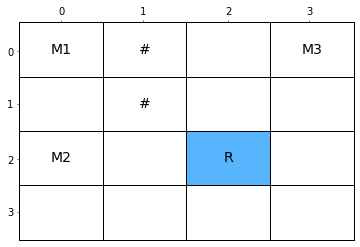

In [5]:
# Definimos el tablero de nodos para simular el estado inicial del enunciado
tabla = [
    [Node('M1', (0,0))  , Node('#', (0,1)), Node('' , (0,2)), Node('M3', (0,3))],
    [Node(''  , (1,0))  , Node('#', (1,1)), Node('' , (1,2)), Node(''  , (1,3))],
    [Node('M2', (2,0))  , Node('' , (2,1)), Node('R', (2,2)), Node(''  , (2,3))],
    [Node(''  , (3,0))  , Node('' , (3,1)), Node('' , (3,2)), Node(''  , (3,3))]
]

# posicion robot
posicion_robot = tabla[2][2]

# posiciones M2
posicion_m2_origen = tabla[2][0]
posicion_m2_destino = tabla[3][2]

# posiciones M1
posicion_m1_origen = tabla[0][0]
posicion_m1_destino = tabla[3][3]

# posiciones M3
posicion_m3_origen = tabla[0][3]
posicion_m3_destino = tabla[3][1]

# Imprimimos por pantalla el tablero para comprobar que todo está OK
imprime_tabla(tabla, [posicion_robot])

Ejecución del algoritmo para mover los inventarios desde la posición en la que se encuentran a la posición destino utilizando el robot. Se parten de las siguientes premisas:

<ul>
<li>Movimiento 1: Robot recoge M2 de posición origen</li>
<li>Movimiento 2: Robot mueve M2 de posición origen a posición destino</li>
<li>Movimiento 3: Robot recoge M1 de posición origen</li>
<li>Movimiento 4: Robot mueve M1 de posición origen a posición destino</li>
<li>Movimiento 5: Robot recoge M3 de posición origen</li>
<li>Movimiento 6: Robot mueve M3 de posición origen a posición destino</li>
</ul>

Ruta para ir de R a M2: (2,2)-->(2,1)-->(2,0)


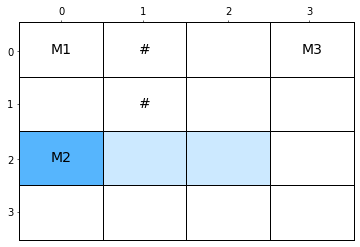

In [6]:
##### Movimiento 1: Robot recoge M2 de posición origen
ruta_robot_m2 = a_star(posicion_robot, posicion_m2_origen, tabla)
# Actualizamos los movimientos realizados y la nueva posición de partida del robot
posicion_robot = ruta_robot_m2[-1:][0]
actualiza_tabla(tabla, ruta_robot_m2)
print('Ruta para ir de R a M2: ' + str(prettify_ruta(ruta_robot_m2)))
imprime_tabla(tabla, ruta_robot_m2)

Ruta para mover M2 a posición destino:(2,0)-->(2,1)-->(3,1)-->(3,2)


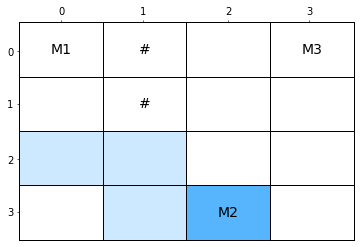

In [7]:
##### Movimiento 2: Robot mueve M2 de posición origen a posición destino
ruta_m2_destino = a_star(posicion_robot, posicion_m2_destino, tabla)
# Actualizamos los movimientos realizados y la nueva posición de partida del robot
posicion_robot = ruta_m2_destino[-1:][0]
actualiza_tabla(tabla, ruta_m2_destino)
print('Ruta para mover M2 a posición destino:' + str(prettify_ruta(ruta_m2_destino)))
imprime_tabla(tabla, ruta_m2_destino)

Ruta para ir de R a M1:(3,2)-->(3,1)-->(3,0)-->(2,0)-->(1,0)-->(0,0)


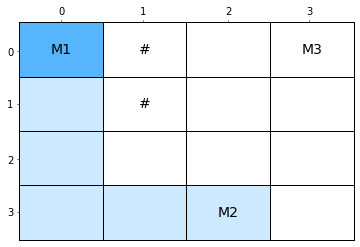

In [8]:
##### Movimiento 3: Robot recoge M1 de posición origen
ruta_robot_m1 = a_star(posicion_robot, posicion_m1_origen, tabla)
# Actualizamos los movimientos realizados y la nueva posición de partida del robot
posicion_robot = ruta_robot_m1[-1:][0]
actualiza_tabla(tabla, ruta_robot_m1)
print('Ruta para ir de R a M1:' + str(prettify_ruta(ruta_robot_m1)))
imprime_tabla(tabla, ruta_robot_m1)

Ruta para mover M1 a posición destino:(0,0)-->(1,0)-->(2,0)-->(2,1)-->(2,2)-->(2,3)-->(3,3)


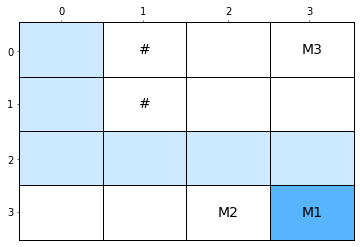

In [9]:
##### Movimiento 4: Robot mueve M1 de posición origen a posición destino
ruta_m1_destino = a_star(posicion_robot, posicion_m1_destino, tabla)
# Actualizamos los movimientos realizados y la nueva posición de partida del robot
posicion_robot = ruta_m1_destino[-1:][0]
actualiza_tabla(tabla, ruta_m1_destino)
print('Ruta para mover M1 a posición destino:' + str(prettify_ruta(ruta_m1_destino)))
imprime_tabla(tabla, ruta_m1_destino)

Ruta para ir de R a M3:(3,3)-->(2,3)-->(1,3)-->(0,3)


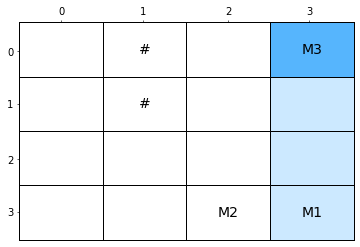

In [10]:
##### Movimiento 5: Robot recoge M3 de posición origen
ruta_robot_m3 = a_star(posicion_robot, posicion_m3_origen, tabla)
# Actualizamos los movimientos realizados y la nueva posición de partida del robot
posicion_robot = ruta_robot_m3[-1:][0]
actualiza_tabla(tabla, ruta_robot_m3)
print('Ruta para ir de R a M3:' + str(prettify_ruta(ruta_robot_m3)))
imprime_tabla(tabla, ruta_robot_m3)

Ruta para mover M3 a posición destino:(0,3)-->(0,2)-->(1,2)-->(2,2)-->(2,1)-->(3,1)


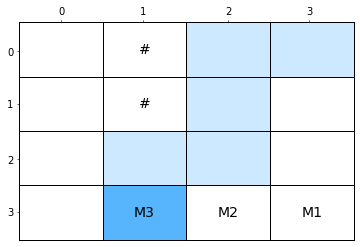

In [11]:
##### Movimiento 6: Robot mueve M3 de posición origen a posición destino
ruta_m3_destino = a_star(posicion_robot, posicion_m3_destino, tabla)
# Actualizamos los movimientos realizados y la nueva posición de partida del robot
posicion_robot = ruta_m3_destino[-1:][0]
actualiza_tabla(tabla, ruta_m3_destino)
print('Ruta para mover M3 a posición destino:' + str(prettify_ruta(ruta_m3_destino)))
imprime_tabla(tabla, ruta_m3_destino)

## Resultados obtenidos

Con esto tenemos solucionado el problema y como se puede observar, el robot es capaz de mover todos los inventarios a las posiciones que se indican en el enunciado.

No obstante, hay una cosa que no se ha tenido en cuenta. En el apartado anterior hemos ido indicando al robot en qué orden queremos que mueva los inventarios, empezando por M2, luego M1 y finalmente M3. 

¿Qué pasaría si le indicamos de primeras que mueva M1 a la posición destino?

En ese caso no podría ya que se encontraría por un lado la pared como obstáculo y por otro el inventario M2, por lo tanto sería incapaz de encontrar una ruta.

Teniendo en cuenta que el algoritmo A* que hemos programado lanza una excepción cuando no es capaz de encontrar una ruta, vamos a intentar jugar con ello para que el robot sea completamente autónomo y sea capaz de mover todos los inventarios independientemente del orden. Es mas, no le diremos ningún orden, simplemente recibirá como entrada el nombre de los inventarios que debe mover y a dónde, y él deberá ser capaz de realizar el trabajo.

Definimos una nueva estructura de datos que contendrá las órdenes de trabajo para el robot. Esto será el único input que tendremos que darle y él debe ser completamente autónomo para resolver el problema.

In [12]:
class Trabajo:
    def __init__(self, origen, destino, descripcion):
        self.origen = origen
        self.destino = destino
        self.realizado = False
        self.descripcion = descripcion

Volvemos a inicializar el tablero para volver al estado inicial que nos indican en el enunciado

In [13]:
tabla = [
    [Node('M1', (0,0))  , Node('#', (0,1)), Node('' , (0,2)), Node('M3', (0,3))],
    [Node(''  , (1,0))  , Node('#', (1,1)), Node('' , (1,2)), Node(''  , (1,3))],
    [Node('M2', (2,0))  , Node('' , (2,1)), Node('R', (2,2)), Node(''  , (2,3))],
    [Node(''  , (3,0))  , Node('' , (3,1)), Node('' , (3,2)), Node(''  , (3,3))]
]

# posicion robot
posicion_robot = tabla[2][2]

# posiciones M2
posicion_m2_origen = tabla[2][0]
posicion_m2_destino = tabla[3][2]

# posiciones M1
posicion_m1_origen = tabla[0][0]
posicion_m1_destino = tabla[3][3]

# posiciones M3
posicion_m3_origen = tabla[0][3]
posicion_m3_destino = tabla[3][1]

Definimos los trabajos a realizar. En nuestro caso tendremos uno por inventario, y los añadiremos a la lista tareas_pendientes

In [14]:
trabajo_inventario_m1 = Trabajo(posicion_m1_origen, posicion_m1_destino, 'mover M1')
trabajo_inventario_m2 = Trabajo(posicion_m2_origen, posicion_m2_destino, 'mover M2')
trabajo_inventario_m3 = Trabajo(posicion_m3_origen, posicion_m3_destino, 'mover M3')

tareas_pendientes = [trabajo_inventario_m1, trabajo_inventario_m2, trabajo_inventario_m3]

Para añadir aún más aleatoriedad al orden de ejecución, importamos la función random de python y descolocamos la lista para que los trabajos a realizar tengan un orden distinto al predefinido.

De este modo, algunas veces llevará el orden M1,M2,M3 pero otras M2,M1,M3 o M3,M1,M2... Independientemente de cómo quede el resultado el robot debe ser capaz de completar el plan

In [15]:
import random
random.shuffle(tareas_pendientes)

Y aquí llega la solución final propuesta. La función realiza_trabajo recibe como input la lista de tareas que debe realizar el robot, y debe ser éste el encargado de solucionarlas sin que le digamos nada más.

Para ello hacemos uso del manejo de excepciones en Python, de modo que si el algoritmo no encuentra ninguna ruta, pasamos a la siguiente tarea y dejamos esta para otro momento. De este modo, llegará el momento en el que siempre mueva M2 antes que M1, por lo que no tendrá ningún problema y siempre podrá encontrar rutas.

In [16]:
def realiza_trabajo(posicion_robot, tareas):
    """
    Esta función itera sobre la lista de tareas a realizar y las va resolviendo. Según vaya resolviendo tareas, 
    las elimina de la lista, lo cual será la condición de parada del bucle 'while'
    Si no encuentra ninguna ruta posible para una tarea dada, captura la excepción y pasa a la siguiente
    :param posicion_robot: Posición de partida en la que se encuentra el robot
    :param tareas: Lista de tareas a realizar desordenada de forma completamente aleatoria
    """
    while tareas:
        for tarea in tareas:
            print('Realizando tarea: ' + str(tarea.descripcion))
            try:
                print('Buscando inventario...')
                ruta, posicion_robot = carga_inventario(posicion_robot, tarea.origen, tabla)
                imprime_tabla(tabla, ruta)
                ruta, posicion_robot = mueve_inventario(posicion_robot, tarea.destino, tabla)
                imprime_tabla(tabla, ruta)
                tareas.remove(tarea)
                print('Tareas pendientes: ' + str(len(tareas)))
            except:
                print('Ninguna ruta fue encontrada... pasamos a la siguiente tarea')
                continue
                
def carga_inventario(posicion_robot, pos_inventario, tabla):
    """
    Simula el movimiento del robot para ir a cargar un inventario    
    :param posicion_robot: Posición actual del robot
    :param posicion_inventario: Posición donde se encuentra el inventario
    :param tabla: Información del estado actual del tablero con todos los nodos
    """
    ruta = a_star(posicion_robot, pos_inventario, tabla)
    posicion_robot = ruta[-1:][0]
    actualiza_tabla(tabla, ruta)
    print(prettify_ruta(ruta))
    print('Inventario cargado!')
    return ruta, posicion_robot

def mueve_inventario(pos_origen, pos_destino, tabla):
    """
    Simula el movimiento del robot para llevar un inventario del punto A al punto B
    :param pos_origen: Posición origen del inventario
    :param pos_destino: Posición objetivo del inventario
    :param tabla: Información del estado actual del tablero con todos los nodos    
    """
    ruta = a_star(pos_origen, pos_destino, tabla)
    posicion_robot = ruta[-1:][0]
    actualiza_tabla(tabla, ruta)
    print(prettify_ruta(ruta))
    print('Inventario desplazado!')
    return ruta, posicion_robot

Finalmente, procedemos a ejecutar la función y observamos los resultados

Realizando tarea: mover M3
Buscando inventario...
(2,2)-->(1,2)-->(0,2)-->(0,3)
Inventario cargado!
(0,3)-->(0,2)-->(1,2)-->(2,2)-->(3,2)-->(3,1)
Inventario desplazado!
Tareas pendientes: 2
Realizando tarea: mover M1
Buscando inventario...
Ninguna ruta fue encontrada... pasamos a la siguiente tarea
Realizando tarea: mover M2
Buscando inventario...
(3,1)-->(2,1)-->(2,0)
Inventario cargado!
(2,0)-->(2,1)-->(2,2)-->(3,2)
Inventario desplazado!
Tareas pendientes: 1
Realizando tarea: mover M1
Buscando inventario...
(3,2)-->(2,2)-->(2,1)-->(2,0)-->(1,0)-->(0,0)
Inventario cargado!
(0,0)-->(1,0)-->(2,0)-->(2,1)-->(2,2)-->(2,3)-->(3,3)
Inventario desplazado!
Tareas pendientes: 0


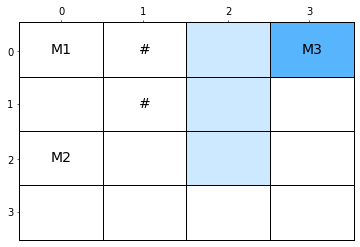

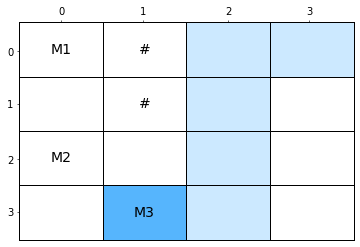

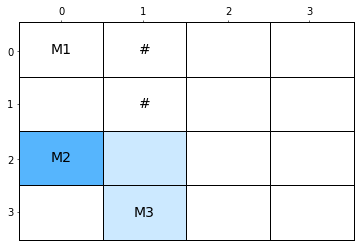

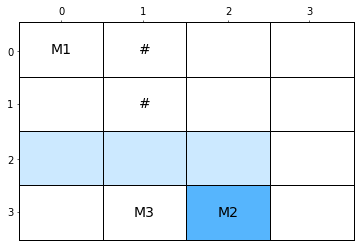

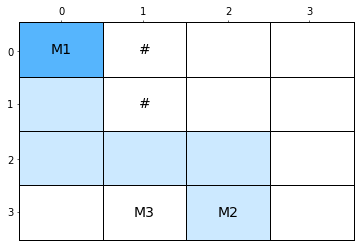

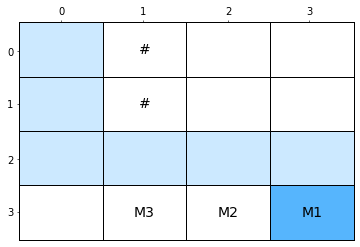

In [17]:
realiza_trabajo(posicion_robot, tareas_pendientes)